In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('Loan Prediction - Train.csv')
test = pd.read_csv('Loan Prediction - Test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
Test_Loan_ID = test['Loan_ID']

train.drop(['Loan_ID'],inplace=True,axis=1)
test.drop(['Loan_ID'],inplace=True,axis=1)

In [4]:

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

result = resumetable(train)
result

Dataset Shape: (614, 12)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,Gender,object,13,2,Male,Male
1,Married,object,3,2,No,Yes
2,Dependents,object,15,4,0,1
3,Education,object,0,2,Graduate,Graduate
4,Self_Employed,object,32,2,No,No
5,ApplicantIncome,int64,0,505,5849,4583
6,CoapplicantIncome,float64,0,287,0.0,1508.0
7,LoanAmount,float64,22,203,NaN,128.0
8,Loan_Amount_Term,float64,14,10,360.0,360.0
9,Credit_History,float64,50,2,1.0,1.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
# For Categorical Data we can fill it with Empty string Value
train.Gender.fillna('None',inplace=True)
test.Gender.fillna('None',inplace=True)
train.Self_Employed.fillna('None',inplace=True)
test.Self_Employed.fillna('None',inplace=True)
train.Dependents.fillna('None',inplace=True)
test.Dependents.fillna('None',inplace=True)

In [9]:
# As test doesnot have null data for Married, If we fill it with None, while OneHot Encoding 1 Column Extra will be created for train then test
# So filling it with Mode
train.Married.fillna(train.Married.mode()[0],inplace=True)
test.Married.fillna(train.Married.mode()[0],inplace=True)

In [10]:
train.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
train['ApplicantIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['ApplicantIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
train.drop(['CoapplicantIncome'],axis=1,inplace=True)
test.drop(['CoapplicantIncome'],axis=1,inplace=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

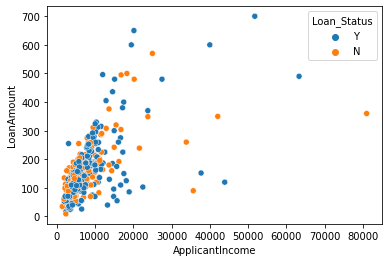

In [13]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=train,hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

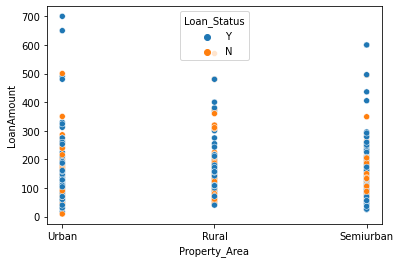

In [14]:
sns.scatterplot(x='Property_Area',y='LoanAmount',data=train,hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

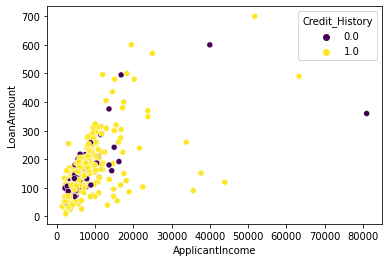

In [15]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=train,hue='Credit_History',palette='viridis')

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

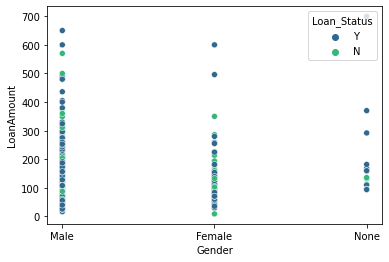

In [16]:
sns.scatterplot(x='Gender',y='LoanAmount',data=train,hue='Loan_Status',palette='viridis')

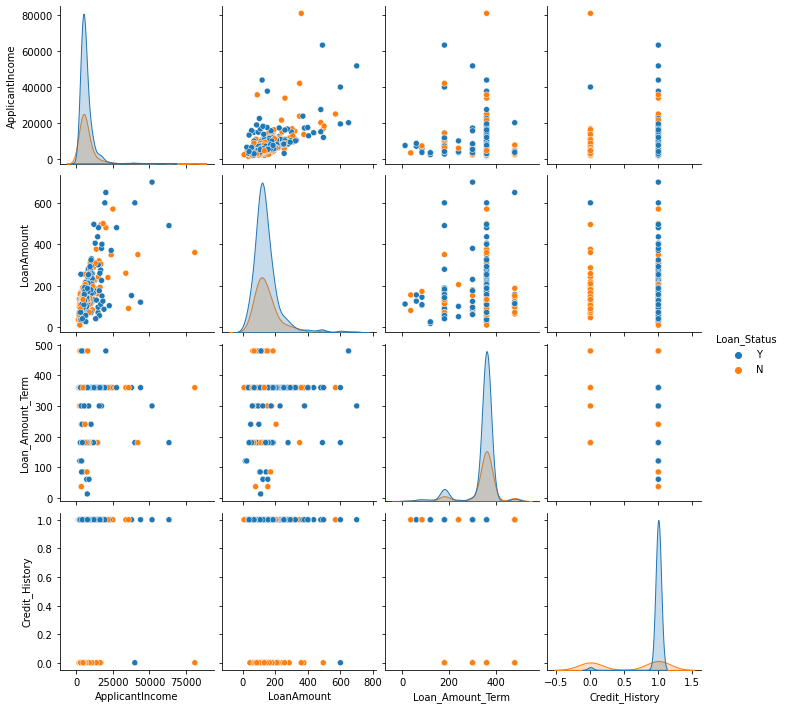

In [17]:
sns.pairplot(train,hue='Loan_Status')

In [18]:
train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
!pip install catboost

In [13]:
'''
if train['ApplicantIncome'] < 4166:
    train['LoanAmount'].fillna(100,inplace=True)
    test['LoanAmount'].fillna(100,inplace=True)
elif train['ApplicantIncome'] >= 4166 and train['ApplicantIncome'] < 5416.5:
    train['LoanAmount'].fillna(128,inplace=True)
    test['LoanAmount'].fillna(128,inplace=True)
elif train['ApplicantIncome'] >= 5416.5 and train['ApplicantIncome'] < 7521.75:
    train['LoanAmount'].fillna(168,inplace=True)
    test['LoanAmount'].fillna(168,inplace=True)  
else:
    train['LoanAmount'].fillna(300,inplace=True)
    test['LoanAmount'].fillna(300,inplace=True)
'''
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
test.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)
test.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [14]:
train.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [15]:
test.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64

In [21]:
train.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000
mean,7024.705081,145.752443,342.410423,0.855049
std,6458.663872,84.107233,64.428629,0.352339
min,1442.000000,9.000000,12.000000,0.000000
25%,4166.000000,100.250000,360.000000,1.000000
50%,5416.500000,128.000000,360.000000,1.000000
75%,7521.750000,164.750000,360.000000,1.000000
max,81000.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='ApplicantIncome'>

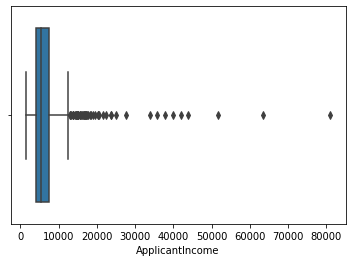

In [22]:
sns.boxplot(x='ApplicantIncome',data=train)

<AxesSubplot:xlabel='LoanAmount'>

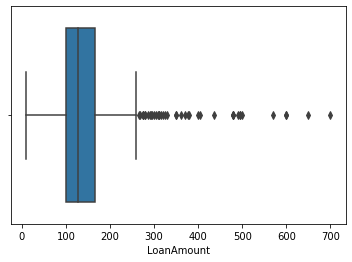

In [23]:
sns.boxplot(x='LoanAmount',data=train)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

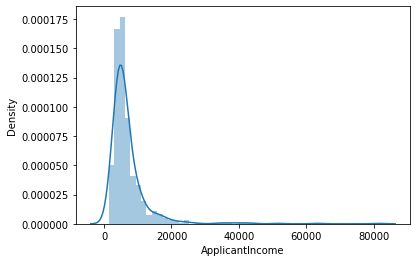

In [24]:
sns.distplot(train['ApplicantIncome'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

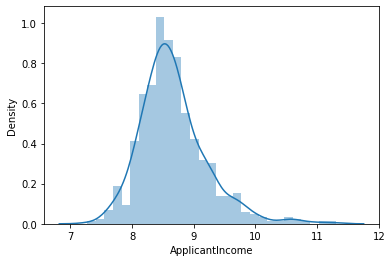

In [25]:
sns.distplot(np.log(train['ApplicantIncome']))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

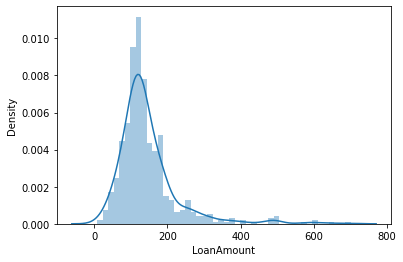

In [26]:
sns.distplot(train['LoanAmount'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

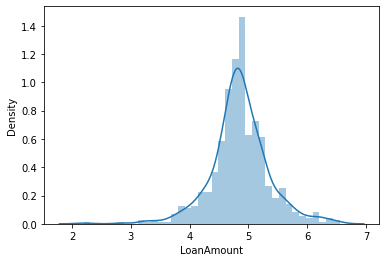

In [27]:
sns.distplot(np.log(train['LoanAmount']))

In [16]:
train['ApplicantIncome'] = np.log(train['ApplicantIncome'])
train['LoanAmount'] = np.log(train['LoanAmount'])
test['ApplicantIncome'] = np.log(test['ApplicantIncome'])
test['LoanAmount'] = np.log(test['LoanAmount'])

In [29]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [30]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.714568,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,8.505323,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,4.948760,360.0,1.0,Urban,Y


In [17]:
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [18]:
train.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_None,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Dependents_None,Education_Not Graduate,Self_Employed_None,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,8.674026,4.852030,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,8.714568,4.852030,360.0,1.0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,8.006368,4.189655,360.0,1.0,1,0,1,0,0,0,0,0,0,1,0,1,1
3,8.505323,4.787492,360.0,1.0,1,0,1,0,0,0,0,1,0,0,0,1,1
4,8.699515,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:>

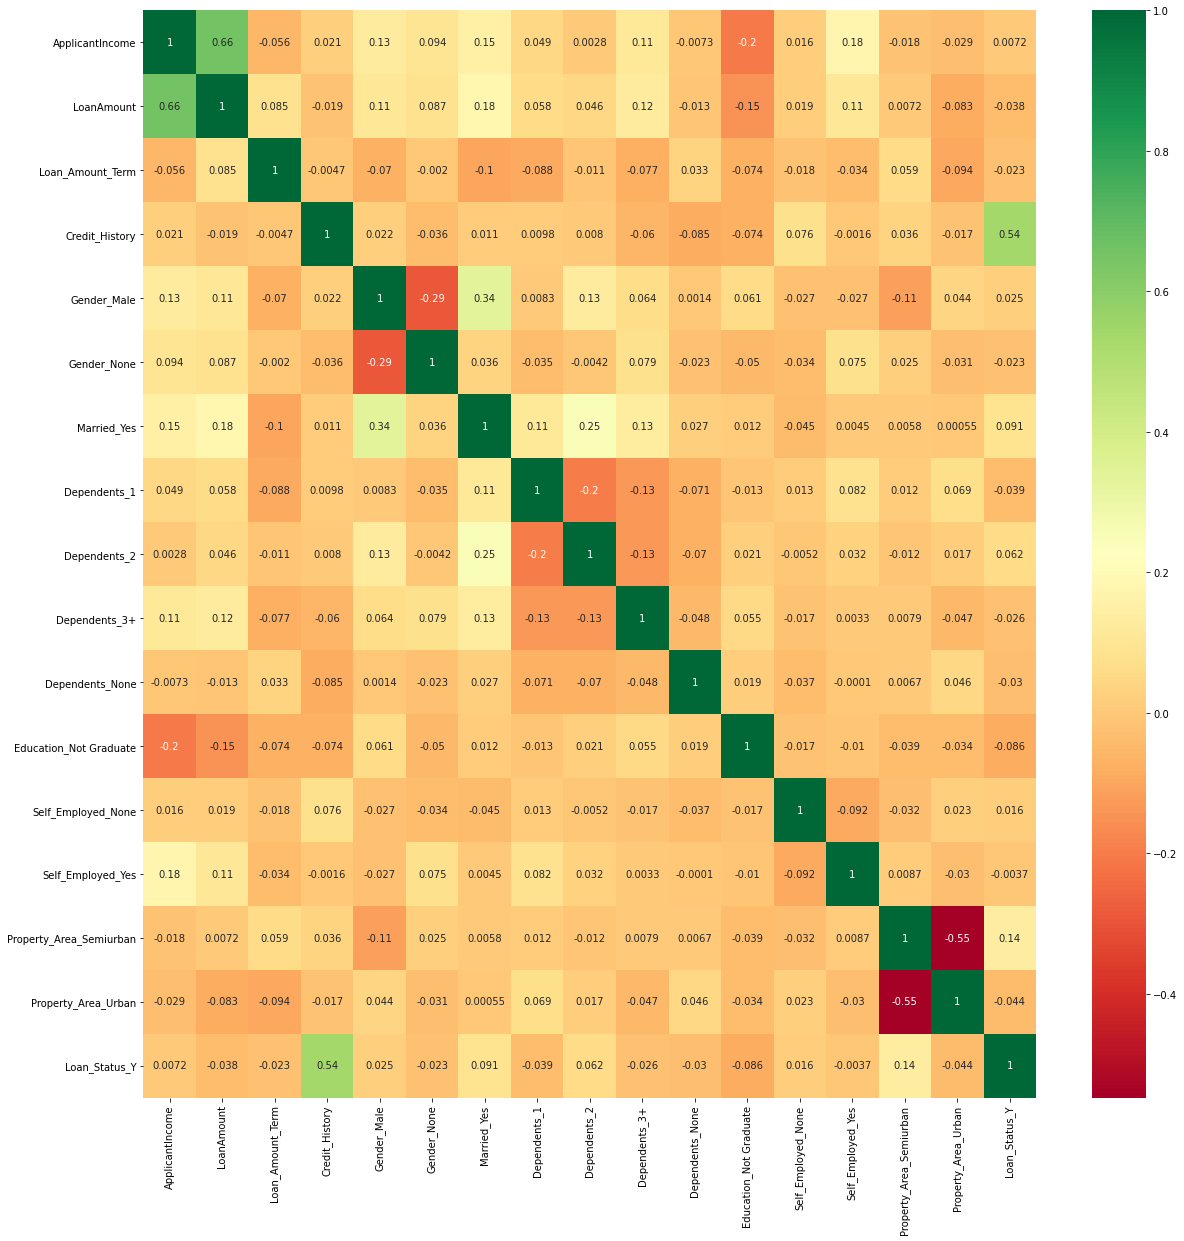

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

In [19]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval = train_test_split(X,y,random_state=1,test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_model = logreg.fit(Xtrain,ytrain)
predict1 = logreg_model.predict(Xval)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(yval,predict1))
print(classification_report(yval,predict1))

[[ 24  37]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [38]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm_model = rm.fit(Xtrain,ytrain)
predict2 = rm_model.predict(Xval)

print(confusion_matrix(yval,predict2))
print(classification_report(yval,predict2))

[[ 28  33]
 [ 11 113]]
              precision    recall  f1-score   support

           0       0.72      0.46      0.56        61
           1       0.77      0.91      0.84       124

    accuracy                           0.76       185
   macro avg       0.75      0.69      0.70       185
weighted avg       0.76      0.76      0.75       185



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_model = gb.fit(Xtrain,ytrain)
predict3 = gb_model.predict(Xval)

print(confusion_matrix(yval,predict3))
print(classification_report(yval,predict3))

[[ 28  33]
 [  6 118]]
              precision    recall  f1-score   support

           0       0.82      0.46      0.59        61
           1       0.78      0.95      0.86       124

    accuracy                           0.79       185
   macro avg       0.80      0.71      0.72       185
weighted avg       0.80      0.79      0.77       185



In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(Xtrain,ytrain)
predict4 = xgb_model.predict(Xval)

print(confusion_matrix(yval,predict4))
print(classification_report(yval,predict4))

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 33  28]
 [ 16 108]]
              precision    recall  f1-score   support

           0       0.67      0.54      0.60        61
           1       0.79      0.87      0.83       124

    accuracy                           0.76       185
   macro avg       0.73      0.71      0.72       185
weighted avg       0.75      0.76      0.75       185



In [41]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in range(100,1200,100)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
rm_random = RandomizedSearchCV(estimator = rm, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rm_random.fit(Xtrain,ytrain)

gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(Xtrain,ytrain)

xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(Xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [42]:
print(rm_random.best_params_)
print(gb_random.best_params_)
print(xgb_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 40}


In [43]:
rm = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 4, max_depth =20)
rm_model = rm.fit(Xtrain,ytrain)
predict2 = rm_model.predict(Xval)

print(confusion_matrix(yval,predict2))
print(classification_report(yval,predict2))

[[ 25  36]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        61
           1       0.77      0.97      0.86       124

    accuracy                           0.78       185
   macro avg       0.82      0.69      0.71       185
weighted avg       0.80      0.78      0.76       185



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 4, max_depth =9)
gb_model = gb.fit(Xtrain,ytrain)
predict3 = gb_model.predict(Xval)

print(confusion_matrix(yval,predict3))
print(classification_report(yval,predict3))

[[ 33  28]
 [ 17 107]]
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        61
           1       0.79      0.86      0.83       124

    accuracy                           0.76       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.75      0.76      0.75       185



In [45]:
xgb = XGBClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 1, max_depth =40)
xgb_model = xgb.fit(Xtrain,ytrain)
predict4 = xgb_model.predict(Xval)

print(confusion_matrix(yval,predict4))
print(classification_report(yval,predict4))

[12:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[ 33  28]
 [ 13 111]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        61
           1       0.80      0.90      0.84       124

    accuracy                           0.78       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.77      0.78      0.77       185



In [46]:
# Using Logistic Regression For Modeling
final_predict = logreg_model.predict(test)

In [47]:
Submission = pd.DataFrame({'Loan_ID':Test_Loan_ID,'Loan_Status':final_predict})
Submission.replace([1,0],['Y','N'],inplace=True)
Submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [48]:
Submission.to_csv('Log_submission.csv',index=False)

In [23]:
import pickle
pickle.dump(logreg_model, open('Loan_Predict.pkl', 'wb'))